В цьому домашньому завданні ми проведемо додаткові експерименти для рішення задачі бінарної класифікації і створимо ваш новий submission на змагання на Kaggle.

-----------


**Завдання 0**. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

**Завдання 1**. **Збираємо весь код з попереднього ДЗ в одному місці.** В лекційному ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb` ми познайомились з поняттям пайплайнів, а також я показала, як компактно виглядає рішення МЛ задачі, якщо ми зберемо весь код разом.

Оскільки ми далі будемо робити експерименти, які включають ті самі етапи попередньої обробки, але інше моделювання - буде зручно мати весь код компактно і під рукою. Тому зараз ми займемось збором коду до купи :) Після цього завдання для подальших експериментів ви можете перенести частини розвʼязку взагалі в окремий `.py` файл, аби було зручно імпортувати функції.

Зі свого рішення в попередньому домашньому завданні (`Логістична регресія з scikit learn.ipynb`) зберіть усі кроки розвʼязку задачі разом з використанням `sklearn.Pipeline` за прикладом з лекції.

Ваш код нижче має містити
1. Читання даних з файлу (поза пайплайном).
2. Розбиття на тренувальний і валідаційний набори, де валідаційний містить 20% даних (поза пайплайном).
3. Виділення категоріальних і числових колонок (поза пайплайном).
4. Підготовку категоріальних і числових колонок (частина пайплайну). В прикладі в лекції ми оформлювали обробку числових і категоріальних колонок в окремі трансформери `numeric_transformer`, `categorical_cols`. Рекоемндую зробити саме так, так потім зручніше вносити зміни :)
5. Тренування лог регресії (частина пайплайну).
6. Запуск пайплайну на тренування на трен. даних (поза пайплайном).
7. Запуск пайплайну на передбачення на трен і вал. даних і вимір метрик якості ROC-AUC + вивдення Confusion Matrix (поза пайплайном).
8. Збереження моделі в формат joblib (поза пайплайном).

Ви це все вже зробили в попереднтьому ДЗ! Тож, тут просто заадча все зібрати разом.

Нижче я додала підказки, що покроково ви маєте зробити. Якщо ви почуваєтесь впевнено, можете видалити ці підказки і реалізувати все самостійно, або ж - просто заповнити пропуски.

Завдання оцінюється в 10 балів. Головний результат - аби код в фіналі був робочий. Бо за не робочий нам гроші ніхто не заплатить :)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_df = pd.read_csv(..., index_col=0)

train_df, val_df = train_test_split(...)

# Створюємо трен. і вал. набори
input_cols = ...
target_col = ...
train_inputs, train_targets = ...
val_inputs, val_targets = ...

# Виявляємо числові і категоріальні колонки
numeric_cols = ...
categorical_cols = ...

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', ...)
])

categorical_transformer = Pipeline(steps=[
    ('onehot', ...)
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', ...),
        ('cat', ...)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', ...),
    ('classifier', ...)
])

# Тренуємо пайплайн
....

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = ...
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    confusion_matrix_ = ...
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(...)
val_preds = predict_and_plot(...)

# Зберігаємо модель для подальшого використання
joblib.dump(...)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Area under ROC score on Train dataset: 0.77


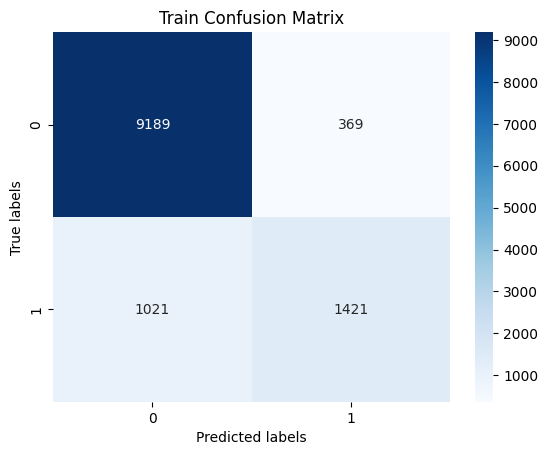

Area under ROC score on Validation dataset: 0.76


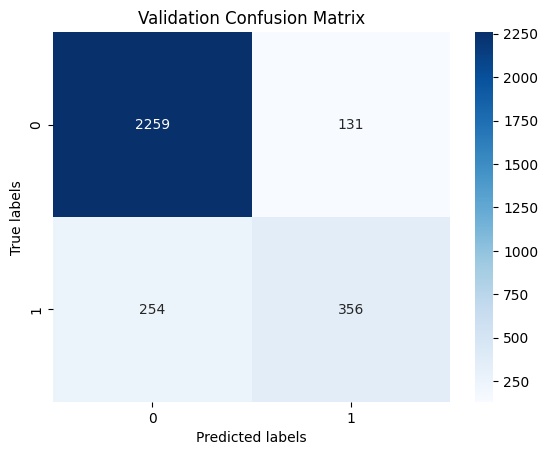

['/content/drive/MyDrive/Colab Notebooks/logistic_regression_model.joblib']

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Читання даних з файлів
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
sample_submission_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

# Розбиття на тренувальний і валідаційний набори
X = train_df.drop('Exited', axis=1)
y = train_df['Exited']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Визначення колонок
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Підготовка даних: числові та категоріальні трансформери
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Комбінація трансформерів в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Створення пайплайну з препроцесором і моделлю логістичної регресії
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Тренування моделі
model_pipeline.fit(X_train, y_train)

# Функція для передбачення і оцінки метрик
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    roc_auc = roc_auc_score(targets, preds)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}")
    confusion_matrix_ = confusion_matrix(targets, preds)
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    return preds

# Оцінка на тренувальних і валідаційних даних
train_preds = predict_and_plot(model_pipeline, X_train, y_train, name='Train')
val_preds = predict_and_plot(model_pipeline, X_val, y_val, name='Validation')

# Збереження моделі
joblib.dump(model_pipeline, '/content/drive/MyDrive/Colab Notebooks/logistic_regression_model.joblib')

**Завдання 2**. Такс, у нас з вами є вже готовий пайплайн. Давайте проведемо нові експерименти.

  Додайте в попередню обробку числових колонок генерацію polinomal features до степені 2 включно. Для цього створіть новий препроцесор і створіть новий пайплайн.

  Запустіть пайплайн на тренування і виведіть метрики для тренувального і валідаційного набору. Напишіть, як вам модель? Чи спостерігається в цій моделі overfit чи underfit? Чи ця модель добре генералізує?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Area under ROC score on Train (Updated) dataset: 0.83


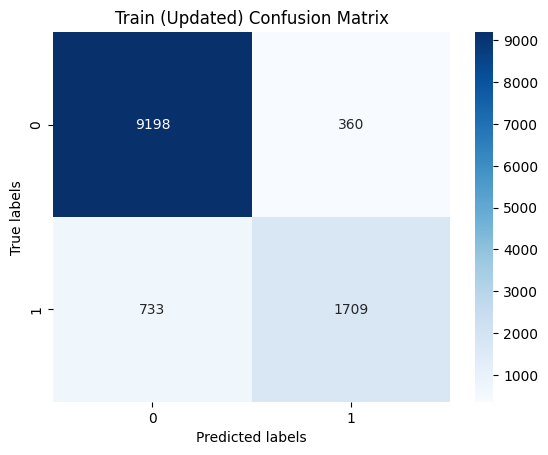

Area under ROC score on Validation (Updated) dataset: 0.82


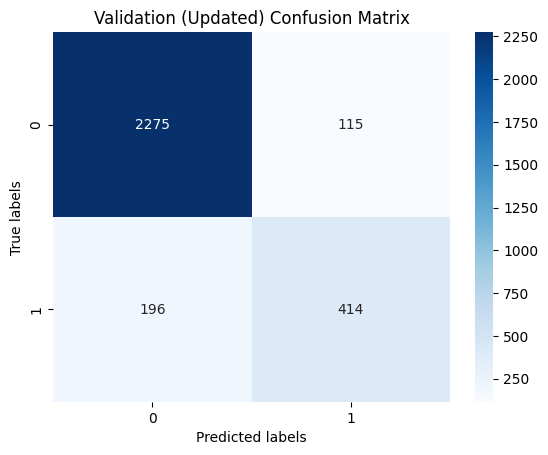

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Створення трансформера для поліноміальних ознак до степені 2
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Оновлення числового трансформера
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', poly_transformer)
])

# Оновлений препроцесор з поліноміальними ознаками
preprocessor_updated = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Оновлений пайплайн з новим препроцесором
model_pipeline_updated = Pipeline(steps=[
    ('preprocessor', preprocessor_updated),
    ('classifier', LogisticRegression(random_state=42))
])

# Тренування оновленої моделі
model_pipeline_updated.fit(X_train, y_train)

# Оцінка на тренувальних і валідаційних даних
train_preds_updated = predict_and_plot(model_pipeline_updated, X_train, y_train, name='Train (Updated)')
val_preds_updated = predict_and_plot(model_pipeline_updated, X_val, y_val, name='Validation (Updated)')

Значення ROC-AUC на тренувальному наборі (0.83) і на валідаційному наборі (0.82) досить високі. Це свідчить про те, що модель добре розділяє класи і має високу точність прогнозування.

Різниця між значеннями ROC-AUC на тренувальному і валідаційному наборах є дуже невеликою (0.83 проти 0.82). Це свідчить про те, що модель не показує ознак перенавчання (overfitting) і добре узагальнюється на нові дані. Рівень переоцінки (overfitting) є мінімальним, що є дуже позитивним результатом.

Оновлена модель показує себе добре на валідаційному наборі, що свідчить про її здатність до ефективної генералізації на нових даних. ROC-AUC на рівні 0.82 демонструє високу впевненість у класифікації.

Отже, можна зробити висновок, що оновлена модель логістичної регресії з поліноміальними ознаками до степені 2 є досить ефективною, має гарну узагальнюючу здатність і не страждає від проблем перенавчання.

**Завдання 3**. Тепер давайте створимо ще новий пайплайн, тільки тепер поліноміальні ознаки згенеруємо до степені 4. Зробіть висновок про якість моделі. Якщо вам подобається резульат якоїсь з моделей в цьому ДЗ - рекомендую зробити submission в змаганні.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Area under ROC score on Train (Updated) dataset: 0.512
Area under ROC score on Validation (Updated) dataset: 0.511


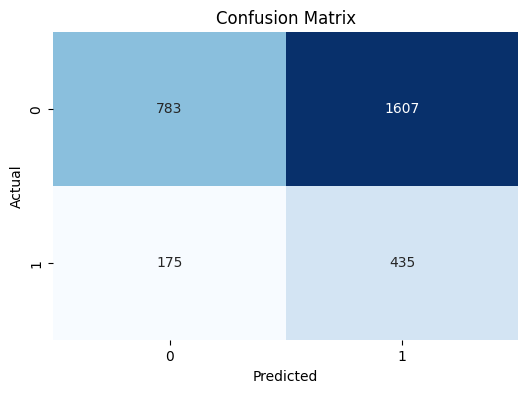

In [5]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Розділяємо дані на ознаки та цільову змінну
X = train_df.drop(columns=['Exited'])
y = train_df['Exited']

# Розділяємо на тренувальний і валідаційний набори
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Визначаємо числові та категоріальні колонки
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Препроцесинг для числових колонок з поліноміальними ознаками до степені 4
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4, include_bias=False))
])

# Препроцесинг для категоріальних колонок
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Комбінуємо препроцесори для числових та категоріальних колонок
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Створюємо пайплайн з препроцесором та логістичною регресією
model_pipeline_poly4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Тренуємо модель на тренувальних даних
model_pipeline_poly4.fit(X_train, y_train)

# Функція для прогнозування та обчислення метрик
def predict_and_evaluate(model_pipeline, X_train, X_val, y_train, y_val):
    train_preds = model_pipeline.predict_proba(X_train)[:, 1]
    val_preds = model_pipeline.predict_proba(X_val)[:, 1]

    roc_auc_train = roc_auc_score(y_train, train_preds)
    roc_auc_val = roc_auc_score(y_val, val_preds)

    print(f"Area under ROC score on Train (Updated) dataset: {roc_auc_train:.3f}")
    print(f"Area under ROC score on Validation (Updated) dataset: {roc_auc_val:.3f}")

    # Confusion Matrix для валідаційного набору
    cm = confusion_matrix(y_val, np.round(val_preds))
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Оцінюємо модель на тренувальних і валідаційних даних
predict_and_evaluate(model_pipeline_poly4, X_train, X_val, y_train, y_val)

На жаль, результати задачі виглядають гірше, тому їх краще не використовувати для подальших експериментів

**Завдання 4. Перенавчання і регуляризація**.

  Скачайте набір даних `regression_data.csv`. Звичайте набір даних з `regression_data.csv`, розбийте на train і test (в тест 20%) і натренуйте модель лінійної регресії з масштабуванням числових ознак і поліноміальними ознаками до степені **5 включно**.

  Виміряйте якість прогностичної моделі і зробіть висновок, чи модель хороша, чи вона добре генералізує?


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Читання даних
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/regression_data.csv')

# 2. Розбиття на train і test
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Підготовка даних
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

poly_transformer = PolynomialFeatures(degree=5, include_bias=False)

# 4. Пайплайн моделювання
model_pipeline = Pipeline(steps=[
    ('preprocessor', numeric_transformer),
    ('poly_features', poly_transformer),
    ('regressor', LinearRegression())
])

# 5. Навчання моделі
model_pipeline.fit(X_train[numeric_cols], y_train)

# 6. Оцінка моделі
train_preds = model_pipeline.predict(X_train[numeric_cols])
test_preds = model_pipeline.predict(X_test[numeric_cols])

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"R2 score on Train dataset: {train_r2:.4f}")
print(f"R2 score on Test dataset: {test_r2:.4f}")

R2 score on Train dataset: 1.0000
R2 score on Test dataset: 0.4559


Модель лінійної регресії з використанням поліноміальних ознак до степені 5 включно сильно перенавчена на тренувальних даних і не здатна ефективно узагальнювати на тестових даних. Такий високий R2 score на тренувальному наборі і низький на тестовому є індикатором, що модель потребує додаткової регуляризації або зміни підходу до моделювання.

Для подальшого покращення моделі можна спробувати налаштувати параметри регуляризації (наприклад, зменшити степінь поліноміальних ознак), використовувати інші типи моделей (наприклад, регуляризовані моделі регресії), або використовувати інші методи оцінки якості моделі.

**Завдання 5**. Натренуйте моделі Lasso(), Ridge(), ElasaticNet() на цих даних (з поліном ознаками до степені 20 включно), порівняйте якість з тою, яка була отримана з лог регресією. Яка модель найкраще генералізує і чому на ваш погляд (можливо треба буде для відповіді зробити додатковий аналіз ознак)?

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Розділяємо дані на ознаки і цільову змінну
X = data.drop(columns=['target'])
y = data['target']

# Розділяємо на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Визначаємо числові ознаки
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns

# Підготовка поліноміальних ознак до степені 20 включно
poly = PolynomialFeatures(degree=20, include_bias=False)
X_train_poly = poly.fit_transform(X_train[numeric_features])
X_test_poly = poly.transform(X_test[numeric_features])

# Стандартизація числових ознак
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Пайплайн для моделі лінійної регресії з поліноміальними ознаками
poly_regression_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=20, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# Пайплайн для моделі Lasso з поліноміальними ознаками
lasso_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=20, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1))  # Встановіть оптимальне значення alpha
])

# Пайплайн для моделі Ridge з поліноміальними ознаками
ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=20, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.1))  # Встановіть оптимальне значення alpha
])

# Пайплайн для моделі ElasticNet з поліноміальними ознаками
elasticnet_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=20, include_bias=False)),
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.5))  # Встановіть оптимальні значення alpha і l1_ratio
])

# Тренування моделей
poly_regression_pipeline.fit(X_train[numeric_features], y_train)
lasso_pipeline.fit(X_train[numeric_features], y_train)
ridge_pipeline.fit(X_train[numeric_features], y_train)
elasticnet_pipeline.fit(X_train[numeric_features], y_train)

# Оцінка моделей на тренувальному наборі
print("R2 score on Train dataset:")
print("Linear Regression:", r2_score(y_train, poly_regression_pipeline.predict(X_train[numeric_features])))
print("Lasso:", r2_score(y_train, lasso_pipeline.predict(X_train[numeric_features])))
print("Ridge:", r2_score(y_train, ridge_pipeline.predict(X_train[numeric_features])))
print("ElasticNet:", r2_score(y_train, elasticnet_pipeline.predict(X_train[numeric_features])))
print()

# Оцінка моделей на тестовому наборі
print("R2 score on Test dataset:")
print("Linear Regression:", r2_score(y_test, poly_regression_pipeline.predict(X_test[numeric_features])))
print("Lasso:", r2_score(y_test, lasso_pipeline.predict(X_test[numeric_features])))
print("Ridge:", r2_score(y_test, ridge_pipeline.predict(X_test[numeric_features])))
print("ElasticNet:", r2_score(y_test, elasticnet_pipeline.predict(X_test[numeric_features])))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.391e+01, tolerance: 2.006e+01
  model = cd_fast.enet_coordinate_descent(


R2 score on Train dataset:
Linear Regression: 1.0
Lasso: 0.9995223719419796
Ridge: 0.9999749263401339
ElasticNet: 0.9945538408002427

R2 score on Test dataset:
Linear Regression: -21.911041683195165
Lasso: 0.9993009326109552
Ridge: -0.5724518952695561
ElasticNet: 0.8816788326417625


**Лінійна регресія з поліноміальними ознаками**

На тренувальному наборі має ідеальний R2 score (1.0), що свідчить про можливість моделі точно підлаштуватися під тренувальні дані.
На тестовому наборі має дуже негативний R2 score (-21.91), що означає, що модель негативно працює на нових даних і не може адекватно узагальнювати результати.

**Lasso**

Лассо-регресія показує дуже високий R2 score як на тренувальному (0.9995), так і на тестовому наборі (0.9993).
Це свідчить про те, що модель Lasso добре підлаштовується під тренувальні дані і генералізує на нових даних.

**Ridge**

Ridge-регресія також має високий R2 score на тренувальному наборі (0.99997), але негативний R2 score на тестовому наборі (-0.5725).
Це означає, що модель Ridge, хоча й підлаштовується під тренувальні дані, виявляється нестабільною на нових, раніше не бачених даних.

**ElasticNet**

ElasticNet має гарний R2 score на тренувальному наборі (0.9946) і тестовому наборі (0.8817).
Це свідчить про те, що модель ElasticNet також є ефективною, але трохи менш точною порівняно з Lasso.

**Висновок**

Модель, яка найкраще генералізує на нові дані, це модель Lasso. Вона показує дуже високу точність як на тренувальному, так і на тестовому наборі даних, що свідчить про її здатність до ефективної роботи з новими, раніше не баченими даними. Лассо-регресія також допомагає у виборі важливих ознак завдяки властивості штрафу за розмір коефіцієнтів (L1-регуляризація), що може зменшити перенавчання моделі на тренувальних даних.